<a href="https://colab.research.google.com/github/gabrielluizone/Gradient-Descent/blob/main/GradDesc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div class="markdown-google-sans">

## <strong>Gradiente Descendente</strong>
> Parabola de um Conj. de Treinamento

Dado o conjunto de treinamento. Qual é a melhor parábola que aprova o conjunto de treinamento de modo a minimizar o erro?
$$[(1, 4), (-1, 5), (2, 7), (-2, 8), (3, 12), (-3, 13), (4, 19), (-4, 20)]$$
</div>

In [6]:
# Importações e Dados
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np
import decimal
import time # Lógico que não podemos esquecer dele

# Pré-Definições antes da Operação
plt.style.use('ggplot')
decimal.getcontext().prec = 5000  # Precisão para 5000 dígitos decimais hahaha

# Dados do conjunto de treinamento
X = np.array([1, -1, 2, -2, 3, -3, 4, -4])
Y = np.array([4, 5, 7, 8, 12, 13, 19, 19])

<div class="markdown-google-sans">

### Definições de Funções e Derivadas Parciais
</div>

In [7]:
# Função para calcular o erro
def calcular_erro(w1, w2, b):
    Y_pred = w1 * X**2 + w2 * X + b
    erro = np.sum((Y - Y_pred)**2)
    return erro

# Função para calcular as derivadas parciais
def calcular_derivadas(X, Y, w1, w2, b):
    n = len(X)
    dw1 = -2 * np.sum(X**2 * (Y - (w1 * X**2 + w2 * X + b))) / n
    dw2 = -2 * np.sum(X * (Y - (w1 * X**2 + w2 * X + b))) / n
    db = -2 * np.sum(Y - (w1 * X**2 + w2 * X + b)) / n
    return dw1, dw2, db

# Função para atualizar os coeficientes usando o método dos gradientes
def atualizar_coeficientes(w1, w2, b, learning_rate, dw1, dw2, db):
    w1_novo = w1 - learning_rate * dw1
    w2_novo = w2 - learning_rate * dw2
    b_novo = b - learning_rate * db
    return w1_novo, w2_novo, b_novo

<div class="markdown-google-sans">

### Gradiente Descendente
</div>

In [8]:
# Parâmetros do método dos gradientes
learning_rate = float(input('Learning Rate\n>> '))
max_iter = int(input('Máximos de Repetições\n>> '))
tolerance = 1e-6

# Inicialização dos coeficientes | Aleatórios
w1 = np.random.rand()
w2 = np.random.rand()
b = np.random.rand()

# Listas para armazenar os resultados dos algoritmos
erro_list = []
w1_list = []
w2_list = []
b_list = []

# Loop de otimização com barra de progresso
ti = time.time()
with tqdm(max_iter) as pbar:
    for i in range(max_iter):
        erro = calcular_erro(w1, w2, b)
        if (erro < tolerance):
            break
        
        # Derivadas Parciais
        dw1, dw2, db = calcular_derivadas(X, Y, w1, w2, b)
        
        # Atualização dos Coeficientes
        w1, w2, b = atualizar_coeficientes(w1, w2, b, learning_rate, dw1, dw2, db)

        erro_list.append(erro)
        w1_list.append(w1)
        w2_list.append(w2)
        b_list.append(b)
        
        # Atualização da barra de progresso
        pbar.set_description(f'{i+1} | Error: {erro:.16f}')
        pbar.update(1)
tf = time.time()

# Resultados finais
print(f'\n\n• Coeficientes otimizados')
print(f'w1 = {w1:.5f}')
print(f'w2 = {w2:.5f}')
print(f'b = {b:.5f}')
print(f'Erro final: {erro:.2f}')

Learning Rate
>> 0.01
Máximos de Repetições
>> 2000


2000 | Error: 0.9949612403182015: : 2000it [00:04, 460.68it/s]



• Coeficientes otimizados
w1 = 0.96705
w2 = -0.10000
b = 3.62209
Erro final: 0.99


<div class="markdown-google-sans">

### Vizualização da Parabola
</div>

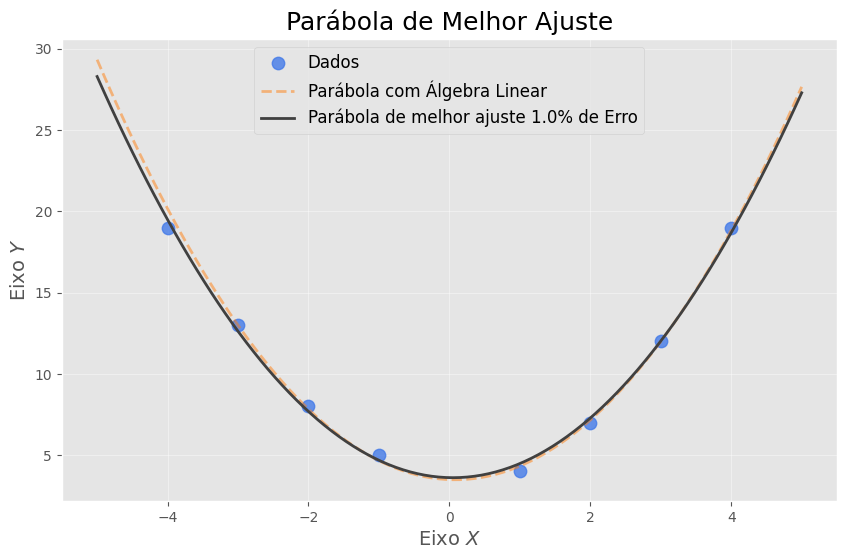

In [9]:
# Criando pontos para plotar a parábola e Figura
fig, ax = plt.subplots(figsize=(10,6))
x_plot = np.linspace(-5, 5, 100)
y_plot = w1*x_plot**2 + w2*x_plot + b

# Cria pontos para plotar a parábola | Álg. Linear
x_real = np.linspace(-5, 5, 100)
y_real = x_real**2 - 0.166666*x_real + 3.5

# Plota os pontos de treinamento e a parábola
ax.scatter(X, Y, color='#437ae8', label='Dados', linewidth=1, alpha=0.8, s=80)
ax.plot(x_plot, y_real, '--', color='#ff7f0e', label='Parábola com Álgebra Linear', linewidth=2, alpha=0.5)
ax.plot(x_plot, y_plot, '-', color='#404040', label=f'Parábola de melhor ajuste {erro:.1f}% de Erro', linewidth=2, alpha=1)

# Título e os rótulos dos eixos
ax.set_title('Parábola de Melhor Ajuste', fontsize=18)
ax.set_xlabel('Eixo $X$', fontsize=14)
ax.set_ylabel('Eixo $Y$', fontsize=14)

# Toques Finais
ax.legend(loc='upper center', fontsize=12)
ax.grid(True, alpha=0.4)
plt.show()

<div class="markdown-google-sans">

### **Extra:** Análise do Algoritmos
</div>

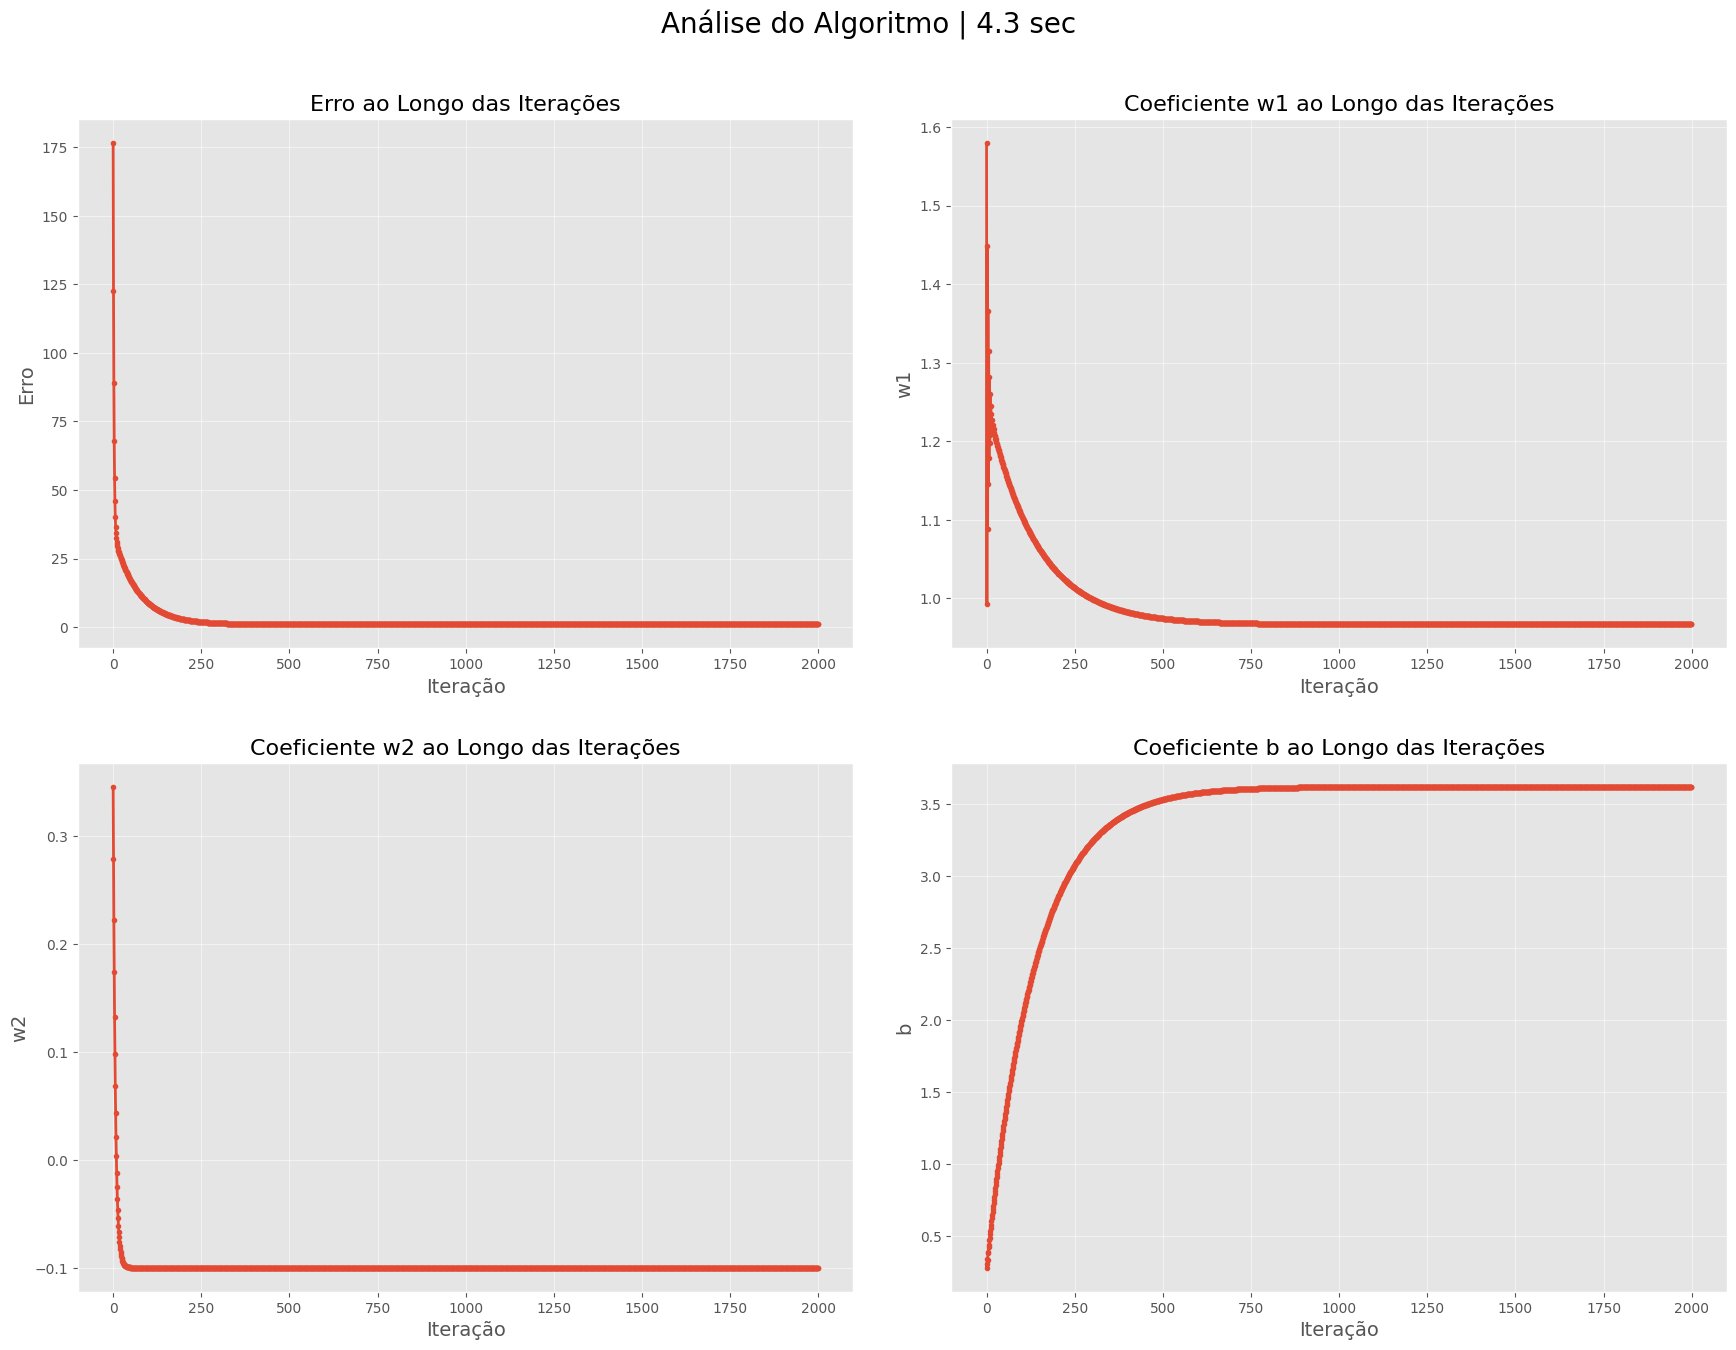

In [10]:
# Gráfico de erro e dos coeficientes ao longo das iterações
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(18, 14))
fig.suptitle(f'Análise do Algoritmo | {(tf - ti):.1f} sec', fontsize=20)

axs[0, 0].plot(erro_list, marker='o', markersize=3, linestyle='-', linewidth=2)
axs[0, 0].set_title('Erro ao Longo das Iterações', fontsize=16)
axs[0, 0].set_xlabel('Iteração', fontsize=14)
axs[0, 0].set_ylabel('Erro', fontsize=14)
axs[0, 0].grid(True, alpha=0.5)

axs[0, 1].plot(w1_list, marker='o', markersize=3, linestyle='-', linewidth=2)
axs[0, 1].set_title('Coeficiente w1 ao Longo das Iterações', fontsize=16)
axs[0, 1].set_xlabel('Iteração', fontsize=14)
axs[0, 1].set_ylabel('w1', fontsize=14)
axs[0, 1].grid(True, alpha=0.5)

axs[1, 0].plot(w2_list, marker='o', markersize=3, linestyle='-', linewidth=2)
axs[1, 0].set_title('Coeficiente w2 ao Longo das Iterações', fontsize=16)
axs[1, 0].set_xlabel('Iteração', fontsize=14)
axs[1, 0].set_ylabel('w2', fontsize=14)
axs[1, 0].grid(True, alpha=0.5)

axs[1, 1].plot(b_list, marker='o', markersize=3, linestyle='-', linewidth=2)
axs[1, 1].set_title('Coeficiente b ao Longo das Iterações', fontsize=16)
axs[1, 1].set_xlabel('Iteração', fontsize=14)
axs[1, 1].set_ylabel('b', fontsize=14)
axs[1, 1].grid(True, alpha=0.5)

plt.tight_layout(pad=3.0)
plt.show()